# Nuages de mots

## Imports et stopwords

In [1]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/celineransart/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
# Stopwords (Idem que dans s1)
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville", "rossel", "dem", "très", "dés", "peu", "etc", "toute", "leurs", "alors", "quand", "dès", 
       "rue", "ruo" "avenue", "ans", "leurs", ]
sw = set(sw)


## Créer un fichier contenant le texte de tous les journaux d'une année donnée

In [23]:
# Choisir une année
year = 1902

In [24]:
# Lister les fichiers de cette année
data_path = '../data'
txt_path = '../data/txt'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f]
len(txts)

100

In [25]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r', encoding='utf-8') as f:
        content_list.append(f.read())

In [26]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

100

In [27]:
# Imprimer les 200 premiers caractères du contenu du premier fichier
content_list[0][0:200]

', ..ne fois rentrés, la querellé s\'envenima, èf," Jft coup, le mari, saisissant un couteau sur r ./ixnble de la cuisine, en plongea la lame. <ians Ta poitrine de sa femme. La malheureuse s’affaissa co'

In [28]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))

In [29]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{year}.txt'), 'r', encoding='utf-8') as f:
    before = f.read()

before[:500]

', ..ne fois rentrés, la querellé s\'envenima, èf," Jft coup, le mari, saisissant un couteau sur r ./ixnble de la cuisine, en plongea la lame. <ians Ta poitrine de sa femme. La malheureuse s’affaissa comme une masse. Sa blessure était mortelle, et c’est dans un état désespéré qu’elle a - été transportée à l’hôpital. — Forces vitales. Pilules Choain ; — Afin d\'offrir dos étrennes fi sa clientèle, les Maisdns Vander Niepen, 9-11, rue du Pont de la Carpe, et 143, chausssée (lTxelleo, verniront samedi'

## Nettoyer le fichier à l'aide d'une fonction de nettoyage

### Créer la fonction de nettoyage (à adapter)

In [30]:
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, 'r', encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.upper() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

### Appliquer la fonction sur le fichier complet de l'année

In [31]:
clean_text(year, folder=temp_path)

'Output has been written in ../data/tmp/1902_clean.txt!'

In [32]:
# Vérifier le résultat
with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r', encoding='utf-8') as f:
    after = f.read()

after[:500]

'FOIS RENTRÉS QUERELLÉ ENVENIMA JFT COUP MARI SAISISSANT COUTEAU IXNBLE CUISINE PLONGEA LAME IANS POITRINE FEMME MALHEUREUSE AFFAISSA MASSE BLESSURE MORTELLE ÉTAT DÉSESPÉRÉ TRANSPORTÉE HÔPITAL FORCES VITALES PILULES CHOAIN AFIN OFFRIR DOS ÉTRENNES CLIENTÈLE MAISDNS VANDER NIEPEN PONT CARPE CHAUSSSÉE LTXELLEO VERNIRONT SAMEDI JANVIER JOUR SEULEMENT RAGCÙT CENT KILO ÉPAULES LIASSE ROTES GIGOT COUPÉ COURT DISE CONCERTS ARTISTIQUES CALORIE COMMERCE VENDREDI MARTAPOURA SAMEDI PIA COROZZI LIAMNCLIOMART'

## Nuage de mots

### Afficher les termes les plus fréquents


In [33]:
frequencies = Counter(after.split())
print(frequencies.most_common(50))

[('LOUER', 1234), ('BRUXELLES', 1168), ('MAISON', 955), ('RUO', 827), ('PRIX', 736), ('BON', 695), ('FILLE', 636), ('PLACE', 612), ('GRAND', 578), ('HEURES', 548), ('DEMANDE', 534), ('NORD', 523), ('CULS', 506), ('QUART', 458), ('JOUR', 434), ('CHEZ', 430), ('MIDI', 430), ('ECR', 422), ('FRANCS', 419), ('GAZ', 414), ('COUR', 403), ('ADR', 401), ('MOIS', 394), ('SERV', 391), ('BONNE', 385), ('NOTAIRE', 381), ('VENDRE', 376), ('EAU', 373), ('AGENCE', 364), ('VEND', 362), ('SACH', 359), ('JOURS', 350), ('VENTE', 332), ('AVENUE', 329), ('POSTE', 318), ('ADRESSER', 316), ('GRANDE', 311), ('HOMME', 310), ('MOD', 307), ('BELLE', 298), ('SUITE', 292), ('BRUX', 287), ('TEMPS', 285), ('HIER', 284), ('RIEN', 283), ('PET', 283), ('PRÈS', 280), ('SOIR', 279), ('SALLE', 275), ('SAINT', 269)]


### Créer, stocker et afficher le nuage de mots

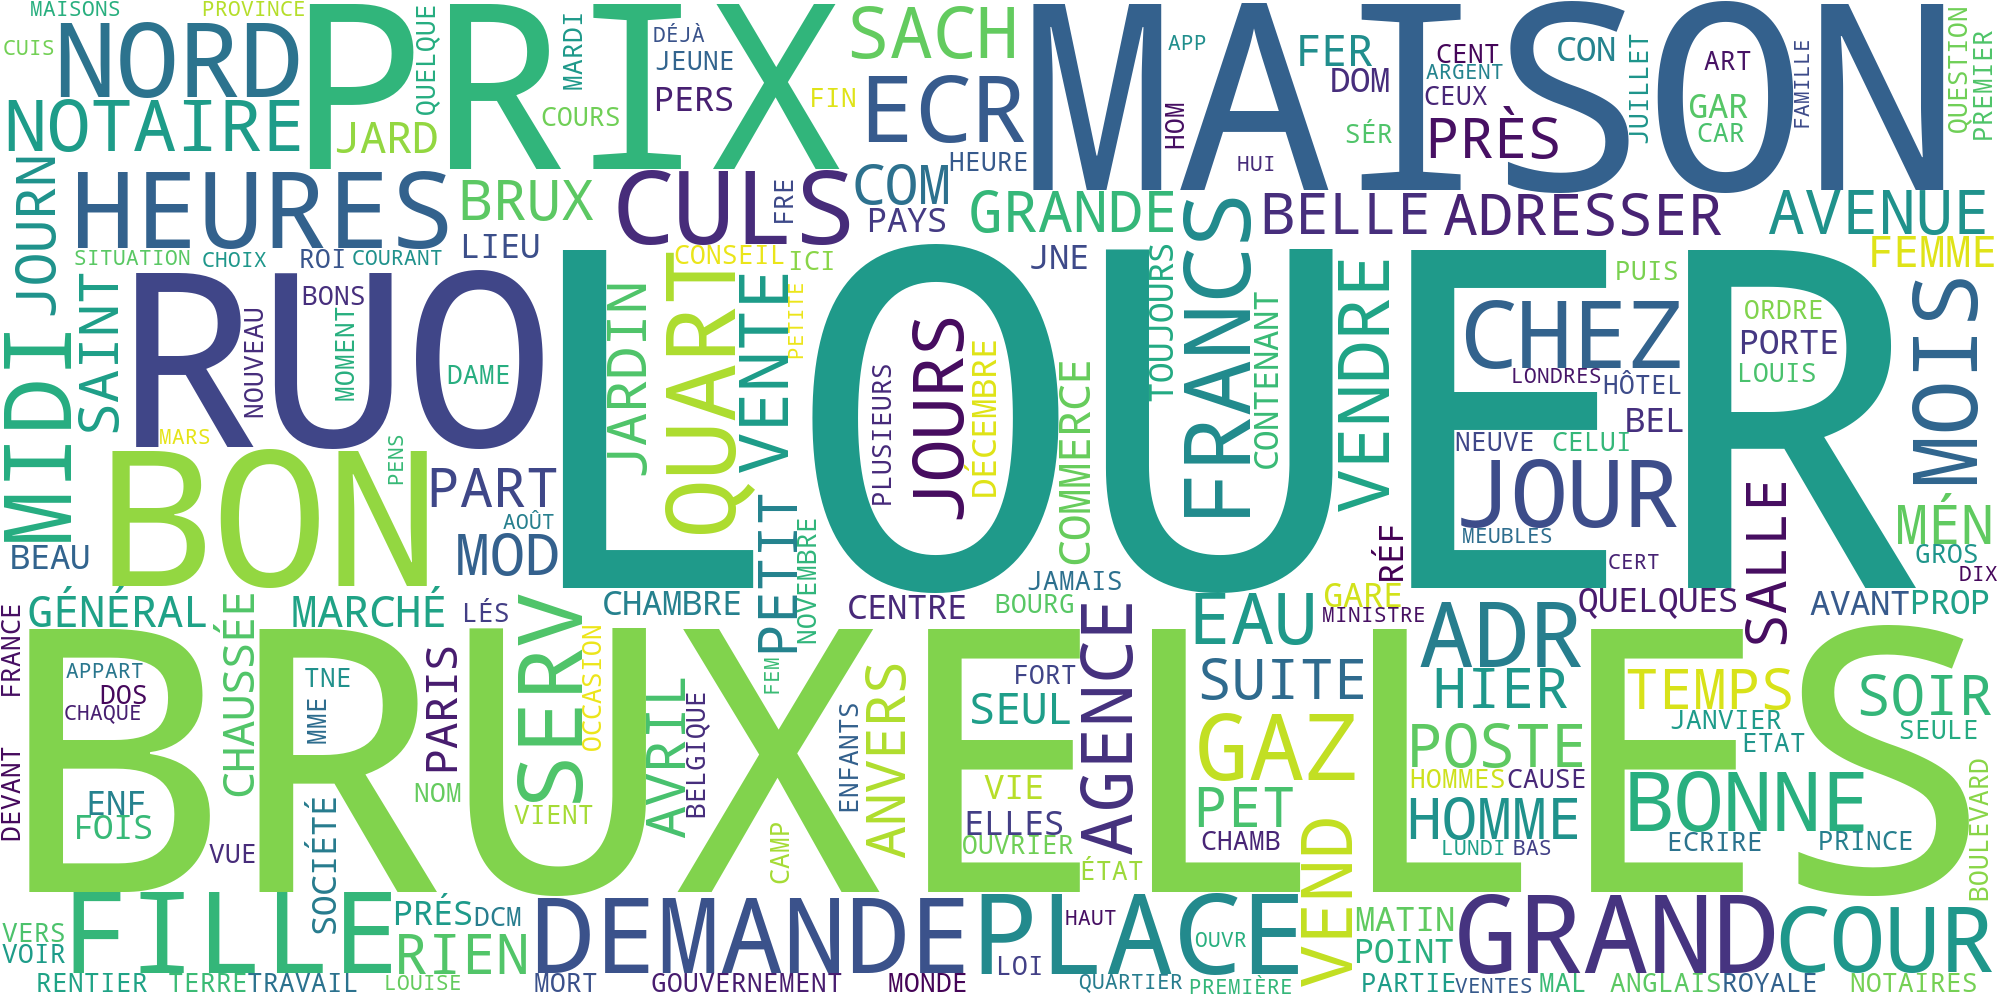

In [34]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))